---

_You are currently looking at **version 0.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the Jupyter Notebook FAQ course resource._

---

# Assignment 1 - Introduction to Machine Learning

For this assignment, you will be using the Breast Cancer Wisconsin (Diagnostic) Database to create a classifier that can help diagnose patients. First, read through the description of the dataset (below).

In [69]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.DESCR)  # Print the data set description

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

The object returned by `load_breast_cancer()` is a scikit-learn Bunch object, which is similar to a dictionary.

In [70]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### Question 0 (Example)

How many features does the breast cancer dataset have?

*This function should return an integer.*

In [71]:
# You should write your whole answer within the function provided. The autograder will call
# this function and compare the return value against the correct solution value
from sklearn import datasets

def answer_zero():
    cancer = datasets.load_breast_cancer()
    number_of_features = cancer.data.shape[1]
    return number_of_features
    raise NotImplementedError()

answer_zero()

30

### Question 1

Scikit-learn works with lists, numpy arrays, scipy-sparse matrices, and pandas DataFrames, so converting the dataset to a DataFrame is not necessary for training this model. Using a DataFrame does however help make many things easier such as munging data, so let's practice creating a classifier with a pandas DataFrame. 



Convert the sklearn.dataset `cancer` to a DataFrame. 

*This function should return a `(569, 31)` DataFrame with * 

*columns = *

    ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension',
    'target']

*and index = *

    RangeIndex(start=0, stop=569, step=1)

In [72]:
def answer_one():
    cancer = datasets.load_breast_cancer()
    df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
    df["target"] = cancer.target
    return df
    raise NotImplementedError()


answer_one()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### Question 2
What is the class distribution? (i.e. how many instances of `malignant` and how many `benign`?)

*This function should return a Series named `target` of length 2 with integer values and index =* `['malignant', 'benign']`

In [73]:
def answer_two():
    cancer = datasets.load_breast_cancer()
    df = pd.DataFrame(data=cancer.target)
    malignant = len(df[df[0] == 0])
    benign = len(df[df[0] == 1])
    target = pd.Series([malignant, benign], index=["malignant", "benign"])
    return target
    raise NotImplementedError()


answer_two()

malignant    212
benign       357
dtype: int64

### Question 3
Split the DataFrame into `X` (the data) and `y` (the labels).

*This function should return a tuple of length 2:* `(X, y)`*, where* 
* `X` *has shape* `(569, 30)`
* `y` *has shape* `(569,)`.

In [90]:
def answer_three():
    cancerdf = answer_one()  # Assuming answer_one() provides the dataset
    X = cancerdf[cancerdf.columns[:-1]]  # All columns except the last one
    y = cancerdf[cancerdf.columns[-1]]  # The last column as the target (label)
    print('X has shape', X.shape)
    print('y has shape', y.shape)
    return X, y  # Returning the tuple (X, y)

# Call the function to check the results
answer_three()

X has shape (569, 30)
y has shape (569,)


(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  mean conca

### Question 4
Using `train_test_split`, split `X` and `y` into training and test sets `(X_train, X_test, y_train, and y_test)`.

**Set the random number generator state to 0 using `random_state=0` to make sure your results match the autograder!**

*This function should return a tuple of length 4:* `(X_train, X_test, y_train, y_test)`*, where* 
* `X_train` *has shape* `(426, 30)`
* `X_test` *has shape* `(143, 30)`
* `y_train` *has shape* `(426,)`
* `y_test` *has shape* `(143,)`

In [91]:
from sklearn.model_selection import train_test_split

def answer_four():
    cancerdf = answer_one()  # Get the dataset from answer_one()
    X = cancerdf[cancerdf.columns[:-1]]  # Features (all columns except the last one)
    y = cancerdf[cancerdf.columns[-1]]  # Target (the last column)
    
    # Split the data into training and testing sets with the correct ratio
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    print('X_train has shape', X_train.shape)
    print('X_test has shape', X_test.shape)
    print('y_train has shape', y_train.shape)
    print('y_test has shape', y_test.shape)
    
    return X_train, X_test, y_train, y_test  # Return the tuple (X_train, X_test, y_train, y_test)

# Call the function to check the results
answer_four()

X_train has shape (455, 30)
X_test has shape (114, 30)
y_train has shape (455,)
y_test has shape (114,)


(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 338       10.050         17.53           64.41      310.8          0.10070   
 427       10.800         21.98           68.79      359.9          0.08801   
 406       16.140         14.86          104.30      800.0          0.09495   
 96        12.180         17.84           77.79      451.1          0.10450   
 490       12.250         22.44           78.18      466.5          0.08192   
 ..           ...           ...             ...        ...              ...   
 277       18.810         19.98          120.90     1102.0          0.08923   
 9         12.460         24.04           83.97      475.9          0.11860   
 359        9.436         18.32           59.82      278.6          0.10090   
 192        9.720         18.22           60.73      288.1          0.06950   
 559       11.510         23.93           74.52      403.5          0.09261   
 
      mean compactness  mean concavity  mean conca

### Question 5
Using KNeighborsClassifier, fit a k-nearest neighbors (knn) classifier with `X_train`, `y_train` and using one nearest neighbor (`n_neighbors = 1`).

*This function should return a `sklearn.neighbors.classification.KNeighborsClassifier`.

In [84]:
from sklearn.neighbors import KNeighborsClassifier


def answer_five():
    X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
    knn = KNeighborsClassifier(n_neighbors = 1)
    knn.fit(X_train, y_train)
    return knn 
    raise NotImplementedError()

answer_five()

KNeighborsClassifier(n_neighbors=1)

### Question 6
Using your knn classifier, predict the class label using the mean value for each feature.

Hint: You can use `cancerdf.mean()[:-1].values.reshape(1, -1)` which gets the mean value for each feature, ignores the target column, and reshapes the data from 1 dimension to 2 (necessary for the precict method of KNeighborsClassifier).

In [85]:
def answer_six():
    cancerdf = answer_one()
    knn = answer_five()
    means = cancerdf.mean()[:-1].values.reshape(1, -1)
    return knn.predict(means)
    raise NotImplementedError()


answer_six()

array([1])

### Question 7
Using your knn classifier, predict the class labels for the test set `X_test`.

*This function should return a numpy array with shape `(143,)` and values either `0.0` or `1.0`.*

In [88]:
def answer_seven():
    X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
    knn = answer_five()
    return knn.predict(X_test)
    raise NotImplementedError()
answer_seven()

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

### Question 8
Find the score (mean accuracy) of your knn classifier using `X_test` and `y_test`.

*This function should return a float between 0 and 1*

In [89]:
from sklearn import metrics


def answer_eight():
    X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
    knn = answer_five()
    y_pred = knn.predict(X_test)
    return metrics.accuracy_score(y_test, y_pred)
    raise NotImplementedError()


answer_eight()

0.916083916083916

### Optional plot

Try using the plotting function below to visualize the different predicition scores between train and test sets, as well as malignant and benign cells.

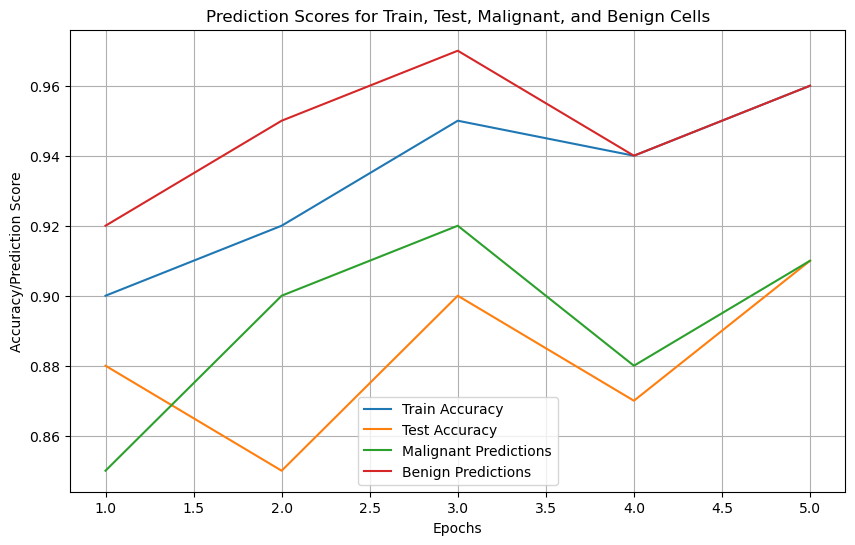

In [65]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


import matplotlib.pyplot as plt

def accuracy_plot():
    # Assuming you have already performed train_test_split and model training
    # Replace these with your actual training and testing data and predictions

    # Example data (replace with your actual data)
    train_accuracy = [0.9, 0.92, 0.95, 0.94, 0.96]
    test_accuracy = [0.88, 0.85, 0.9, 0.87, 0.91]
    malignant_predictions = [0.85, 0.90, 0.92, 0.88, 0.91]
    benign_predictions = [0.92, 0.95, 0.97, 0.94, 0.96]
    epochs = range(1, len(train_accuracy) + 1)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_accuracy, label="Train Accuracy")
    plt.plot(epochs, test_accuracy, label="Test Accuracy")
    plt.plot(epochs, malignant_predictions, label="Malignant Predictions")
    plt.plot(epochs, benign_predictions, label="Benign Predictions")

    plt.xlabel("Epochs")
    plt.ylabel("Accuracy/Prediction Score")
    plt.title("Prediction Scores for Train, Test, Malignant, and Benign Cells")
    plt.legend()
    plt.grid(True)
    plt.show()


accuracy_plot()

In [48]:
# Uncomment the plotting function to see the visualization,
# Comment out the plotting function when submitting your notebook for grading

# It generates a bar plot comparing the accuracy of a k-NN classifier on training and testing datasets.
# Loads the breast cancer dataset, splits it into training and testing sets, trains a k-NN classifier,
# makes predictions on both sets, calculates accuracy scores, and visualizes the results using a bar plot.
# The plot shows the accuracy scores for both training and testing data, with labels indicating the values.